
--- Before Preprocessing Data Summary ---

               time            ax            ay            az            wx  \
count  5.976945e+06  5.976945e+06  5.976945e+06  5.976945e+06  5.976945e+06   
mean   1.678110e+12 -8.815476e-02 -8.404864e-01  2.618773e-01  2.923475e-03   
std    5.212655e+09  3.933417e-01  3.629885e-01  2.999832e-01  2.960635e+01   
min    1.668425e+12 -1.573584e+01 -1.599902e+01 -1.599902e+01 -9.149170e+02   
25%    1.679049e+12 -3.393555e-01 -9.912109e-01  6.542969e-02 -7.324219e+00   
50%    1.680783e+12 -9.619141e-02 -8.989258e-01  2.500000e-01  6.103516e-02   
75%    1.681285e+12  1.406250e-01 -7.446289e-01  4.658203e-01  7.568359e+00   
max    1.683204e+12  1.599951e+01  1.400000e+01  1.562305e+01  7.787476e+02   

                 wy            wz            ex            ey            ez  \
count  5.976945e+06  5.976945e+06  5.976945e+06  5.976945e+06  5.976945e+06   
mean  -4.353116e-01 -1.215407e-01 -6.973642e+01  6.191912e+00  8.805830e+00   
std    

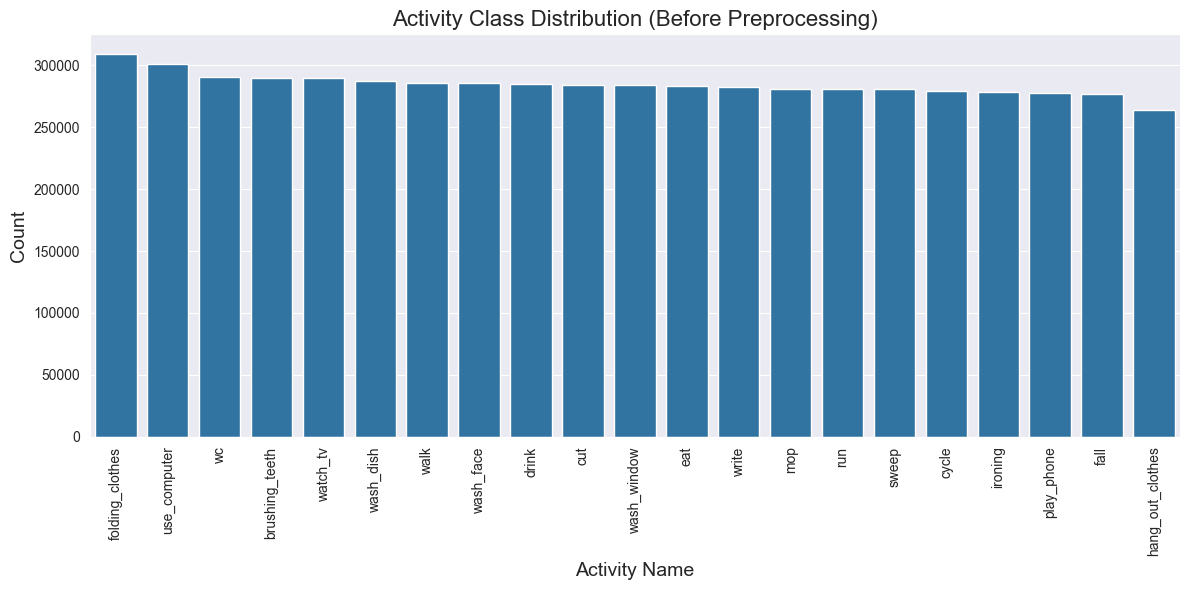


--- After Normalization Data Summary ---

               time            ax            ay            az            wx  \
count  5.976945e+06  5.976945e+06  5.976945e+06  5.976945e+06  5.976945e+06   
mean   1.678110e+12 -3.652012e-17  8.639290e-17 -6.333958e-17 -1.467462e-17   
std    5.212655e+09  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min    1.668425e+12 -3.978141e+01 -4.176038e+01 -5.420603e+01 -3.090283e+01   
25%    1.679049e+12 -6.386324e-01 -4.152323e-01 -6.548619e-01 -2.474855e-01   
50%    1.680783e+12 -2.043171e-02 -1.609952e-01 -3.959313e-02  1.962811e-03   
75%    1.681285e+12  5.816312e-01  2.640786e-01  6.798482e-01  2.555342e-01   
max    1.683204e+12  4.089998e+01  4.088418e+01  5.120676e+01  2.630330e+01   

                 wy            wz            ex            ey            ez  \
count  5.976945e+06  5.976945e+06  5.976945e+06  5.976945e+06  5.976945e+06   
mean   7.874650e-18 -5.197459e-18  1.311015e-17  1.308638e-17  5.325850e-19   
std    1

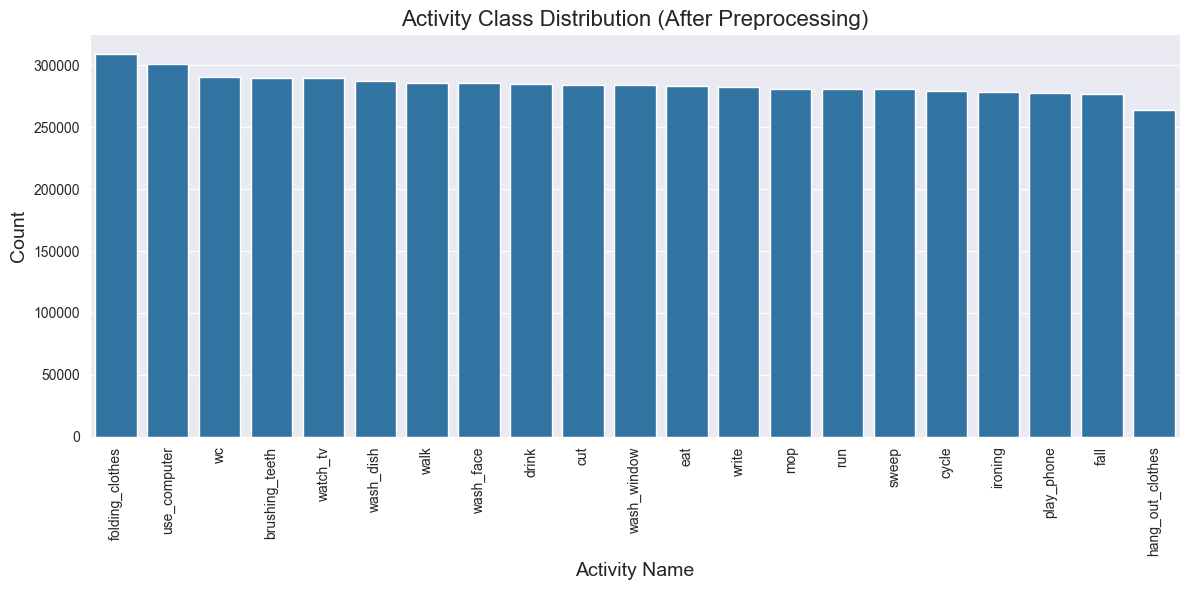

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Function to print summary statistics
def print_summary(data, stage):
    print(f"\n--- {stage} Data Summary ---\n")
    print(data.describe())
    print("\nMissing values check:\n", data.isnull().sum())

# Function to read and concatenate all data files
def read_files(base_dir):
    all_data = []
    for subject_folder in os.listdir(base_dir):
        subject_path = os.path.join(base_dir, subject_folder)
        if os.path.isdir(subject_path):
            subject_number = int(subject_folder.split("_")[-1])
            for csv_file in os.listdir(subject_path):
                if csv_file.endswith("arm_r.csv"):
                    file_path = os.path.join(subject_path, csv_file)
                    df = pd.read_csv(file_path)
                    df["subject"] = subject_number
                    df["body_part"] = csv_file.split(".")[0]
                    all_data.append(df)
    return pd.concat(all_data, ignore_index=True)

# Function to normalize features
def normalize_features(data):
    scaler = StandardScaler()
    columns_to_normalize = ["ax", "ay", "az", "wx", "wy", "wz", "ex", "ey", "ez"]
    data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
    return data

# Function to encode activity labels
def encode_labels(data):
    label_encoding = {
        "fall": 0, "run": 1, "walk": 2, "cycle": 3, "lay": 4, "squat": 5, "mop": 6, "drink": 7, "sweep": 8,
        "brushing_teeth": 9, "cut": 10, "eat": 11, "folding_clothes": 12, "hang_out_clothes": 13, "ironing": 14,
        "open_door": 15, "open_fridge": 16, "sit": 17, "stand": 18, "use_computer": 19, "wash_dish": 20,
        "wash_face": 21, "wash_window": 22, "watch_tv": 23, "watering_flowers": 24, "write": 25, "wc": 26,
        "play_phone": 27, "switch": 28
    }
    data["encoded_label"] = data["label"].map(label_encoding)
    return data

# Function to create bar charts before and after preprocessing
def visualize_class_distribution(data, stage, save_path):
    plt.figure(figsize=(12, 6))
    sns.countplot(x="label", data=data, order=data["label"].value_counts().index)
    plt.title(f"Activity Class Distribution ({stage})", fontsize=16)
    plt.xlabel("Activity Name", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.show()

def worker(base_dir):
    # Read and combine all data
    data = read_files(base_dir)

    # Print summary before preprocessing
    print_summary(data, "Before Preprocessing")

    # Visualize class distribution before preprocessing
    visualize_class_distribution(data, "Before Preprocessing", "class_distribution_before_preprocessing.png")

    # Normalize features
    normalized_data = normalize_features(data)

    # Print summary after normalization
    print_summary(normalized_data, "After Normalization")

    # Encode labels
    normalized_data = encode_labels(normalized_data)

    # Visualize class distribution after preprocessing
    visualize_class_distribution(normalized_data, "After Preprocessing", "class_distribution_after_preprocessing.png")

base_dir = "../Datasets/CAPP Dataset/data"
worker(base_dir)